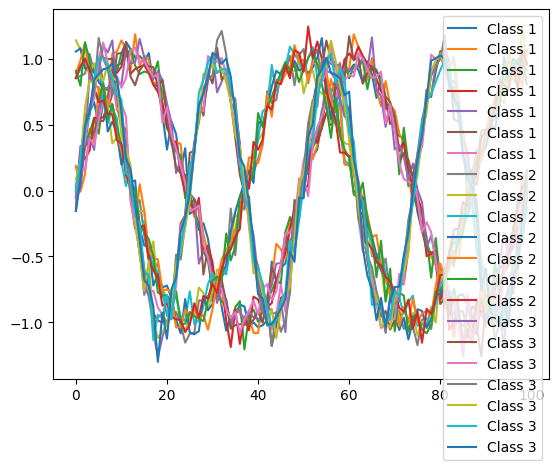

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import euclidean_distances

# Генерация временных рядов
np.random.seed(0)
n_series = 21
n_classes = 3
n_samples = 100
t = np.linspace(0, 4*np.pi, n_samples)

# Генерация трех различных сигналов (классов)
signals = np.empty((n_series, n_samples))
signals[:7] = np.sin(t) + np.random.normal(0, 0.1, (7, n_samples)) # класс 1
signals[7:14] = np.cos(t) + np.random.normal(0, 0.1, (7, n_samples)) # класс 2
signals[14:] = np.sin(2*t) + np.random.normal(0, 0.1, (7, n_samples)) # класс 3

# Выводим график сигналов
for i, signal in enumerate(signals):
    plt.plot(signal, label=f"Class {i//7+1}")
plt.legend()
plt.show()


In [2]:
from dtw import dtw

# Расчет евклидового расстояния
euclidean_dist = euclidean_distances(signals)

# Расчет DTW расстояния
dtw_dist = np.empty((n_series, n_series))
for i in range(n_series):
    for j in range(n_series):
        dtw_dist[i, j] = dtw(signals[i], signals[j]).distance

# Выводим расстояния
print("Euclidean distances:")
print(euclidean_dist)
print("\nDTW distances:")
print(dtw_dist)


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.

Euclidean distances:
[[ 0.          1.36155354  1.33799801  1.43442155  1.47014241  1.48171592
   1.53040042  9.93999365 10.00066458  9.96568758 10.09742987  9.83234808
   9.94883072 10.04460754 10.0935868   9.94578112 10.10182324 10.14955905
  10.0460324   9.86406082 10.08363448]
 [ 1.36155354  0.          1.37346488  1.36513302  1.49485859  1.53566562
   1.53057914 10.09329601 10.16696162 10.13223935 10.25499342  9.99321389
  10.10878049 10.19525676 10.38879642 10.23005348 10.38203628 10.42818225
  10.36241257 10.13703704 10.3672273 ]
 [ 1.33799801  1.37346488  0.          1.25097335  1.33787572  1.26769837
   1.34940624  9.94393929 10.01233578  9.97395256 10.10860512  9.80263365
   9.94195611 10.02715331 10.11809735  9.95793931 10.1301562  10.14973248
  10.09060444  9.87432854

Евклидово расстояние - это простейшая метрика, вычисляющая обычное расстояние между двумя точками в пространстве. В контексте временных рядов, она просто измеряет расстояние между соответствующими точками двух временных рядов. Однако, эта метрика не учитывает возможные сдвиги или искажения во времени.

Dynamic Time Warping (DTW) - это более сложная метрика, которая может измерять расстояние между двумя временными рядами, даже если они сдвинуты или искажены во времени. Она находит оптимальное сопоставление между точками двух временных рядов, минимизируя общее расстояние между сопоставленными точками.

In [3]:
# Создание меток классов
labels = np.repeat(np.arange(n_classes), 7)

# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(signals, labels, test_size=0.3, random_state=0)

# Обучение классификаторов
knn_dtw = KNeighborsClassifier(metric='precomputed')
knn_dtw.fit(dtw_dist[:14, :14], y_train)
knn_euclidean = KNeighborsClassifier()
knn_euclidean.fit(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_knn_dtw = knn_dtw.predict(dtw_dist[14:, :14])
y_pred_knn_euclidean = knn_euclidean.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Выводим результаты
print("Точность KNN с DTW:", accuracy_score(y_test, y_pred_knn_dtw))
print("Точность KNN с евклидовым расстоянием:", accuracy_score(y_test, y_pred_knn_euclidean))
print("Точность случайного леса:", accuracy_score(y_test, y_pred_rf))

Точность KNN с DTW: 0.0
Точность KNN с евклидовым расстоянием: 1.0
Точность случайного леса: 1.0


Модели KNN с евклидовым расстоянием и Random Forest показали идеальную точность 1.0 на тестовых данных, что означает, что они правильно классифицировали все тестовые примеры. Однако, модель KNN с DTW показала точность 0.0, что означает, что она не смогла правильно классифицировать ни одного тестового примера.